In [1]:
import numpy as np
import pandas as pd

# Import CSV file
file_path = "/Users/lobster/Desktop/Movie Replication Set.csv"

df = pd.read_csv(file_path)

df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [2]:
from scipy.stats import ks_2samp
import numpy as np
import pandas as pd

# Import CSV file
file_path = "/Users/lobster/Desktop/Movie Replication Set.csv"
df = pd.read_csv(file_path)

# Extract ratings for 'Home Alone (1990)' and 'Finding Nemo (2003)'
home_alone_ratings = pd.to_numeric(df['Home Alone (1990)'], errors='coerce').values
finding_nemo_ratings = pd.to_numeric(df['Finding Nemo (2003)'], errors='coerce').values

# Element-wise deletion of NaNs for these movies
valid_indices = np.isfinite(home_alone_ratings) & np.isfinite(finding_nemo_ratings)
home_alone_ratings = home_alone_ratings[valid_indices]
finding_nemo_ratings = finding_nemo_ratings[valid_indices]

# Perform KS test
ks_statistic, p_value = ks_2samp(home_alone_ratings, finding_nemo_ratings)

# Set the per-test significance level 𝛼 to 0.005
significance_level = 0.005

# Compare the p-value to the significance level
is_significant = p_value < significance_level

print("KS statistic:", ks_statistic)
print("P-value:", p_value)
print("Is significant:", is_significant)


KS statistic: 0.16790123456790124
P-value: 2.2038507937682687e-10
Is significant: True


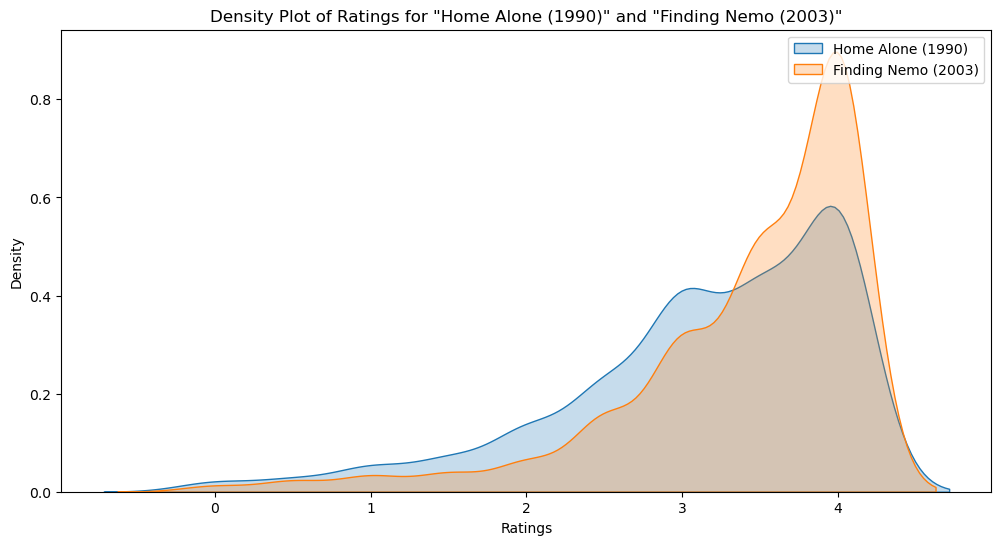

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Draw the density plot for 'Home Alone (1990)'
sns.kdeplot(home_alone_ratings, label="Home Alone (1990)", fill=True)

# Draw the density plot for 'Finding Nemo (2003)'
sns.kdeplot(finding_nemo_ratings, label="Finding Nemo (2003)", fill=True)

# Add title and labels
plt.title('Density Plot of Ratings for "Home Alone (1990)" and "Finding Nemo (2003)"')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

